# **Classification Model Comparison: Decision Tree Vs Neural Networks**
## Assignment 1 - IN6227 Data Mining
### Gerry Julian - G2507395K
*Nanyang Technological University - Wee Kim Wee School of Communication and Information - MSIS*

**Objective : Train, test, and compare two classifiers using the provided dataset with classification models.**

***Chosen Classification Model : Decision Tree & Neural Networks***

There are several steps to completing this task. The process shown as follows:
1. Import Libraries
2. Load Data
3. Inspect Dataset (Before Cleaning)
4. Data Cleaning
5. Inspect Dataset (After Cleaning)
6. Data Exploration (EDA)
7. Data Preprocessing
8. Model Setup
9. Evaluate Models

### **1. Import Libraries**

In [150]:
# --------------------------
# 1. Import Libraries
# --------------------------
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,auc,precision_recall_curve, confusion_matrix, classification_report,ConfusionMatrixDisplay


### **2. Load Data**

In [151]:
# --------------------------
# 2. Load dataset
# --------------------------

data_path_train = "../data_source/adult.data"  # relative path to the file
data_path_test = "../data_source/adult.test"  # relative path to the file

columns = [
    "age", "workclass","fnlwgt","education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

df_train= pd.read_csv(data_path_train, names=columns, sep=r",\s*", engine="python")
df_test= pd.read_csv(data_path_test, names=columns, sep=r",\s*", engine="python",skiprows=1)

print("--------Training Data--------")
print("First 5 rows of dataset:")
print(df_train.head())
print("Dataset shape:", df_train.shape)

print("--------Test Data--------")
print("First 5 rows of dataset:")
print(df_test.head())
print("Dataset shape:", df_test.shape)


--------Training Data--------
First 5 rows of dataset:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-Sta

### **3. Inspect Dataset (Before Cleaning)**

**3.1 Dataset Information**

In [152]:
# --------------------------
# Step 3: Inspect Dataset (Before Cleaning)
# --------------------------

# --------------------------
# 3.1: Dataset Overview
# --------------------------

# Dataset Information
print("\n--- Dataset Info ---")
print("\n### Train Data ###")
print(df_train.info())
print("\n### Test Data ###")
print(df_test.info())

# Target Value Counts
print("\n--- Target Value Counts ---")

print("\n### Train Data ###")
print(df_train['income'].value_counts())
print("\n### Test Data ###")
print(df_test['income'].value_counts())


--- Dataset Info ---

### Train Data ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

### Test Data ###
<class 'pandas.core.frame.D

**3.2 Compare Data Type**

In [153]:
# --------------------------
# 3.2: Compare Datatypes
# --------------------------
print("\n--- Dtype Comparison (Train vs Test) ---")
dtype_train = df_train.dtypes
dtype_test = df_test.dtypes

# Put side by side
dtype_check = pd.DataFrame({
    "Train dtypes": dtype_train,
    "Test dtypes": dtype_test
})

print(dtype_check)

mismatched_cols = dtype_check[dtype_check["Train dtypes"] != dtype_check["Test dtypes"]]
print("\nColumns with mismatched dtypes:\n", mismatched_cols)



--- Dtype Comparison (Train vs Test) ---
               Train dtypes Test dtypes
age                   int64       int64
workclass            object      object
fnlwgt                int64       int64
education            object      object
education-num         int64       int64
marital-status       object      object
occupation           object      object
relationship         object      object
race                 object      object
sex                  object      object
capital-gain          int64       int64
capital-loss          int64       int64
hours-per-week        int64       int64
native-country       object      object
income               object      object

Columns with mismatched dtypes:
 Empty DataFrame
Columns: [Train dtypes, Test dtypes]
Index: []


**3.3 Check Duplicate Data**

In [154]:
# --------------------------
# 3.3: Check Duplicate Data
# --------------------------

# Check Duplicate Training Data
num_duplicates_train = df_train.duplicated().sum()
print("\n--- Check Duplicate Row in Training Data ---")
print(f"Number of duplicate rows: {num_duplicates_train}")

# Check Duplicate Training Data
num_duplicates_test = df_test.duplicated().sum()
print("\n--- Check Duplicate Row in Test Data ---")
print(f"Number of duplicate rows: {num_duplicates_test}")




--- Check Duplicate Row in Training Data ---
Number of duplicate rows: 24

--- Check Duplicate Row in Test Data ---
Number of duplicate rows: 5


**3.4 Check Missing Value (Train Dataset)**


--- Check Missing Values in Training Dataset ---
Total missing values in dataset: 4262
Total rows with at least one missing value: 2399
Percentage of rows impacted by missing values: 7.37%
Percentage of missing values in the dataset: 0.87%


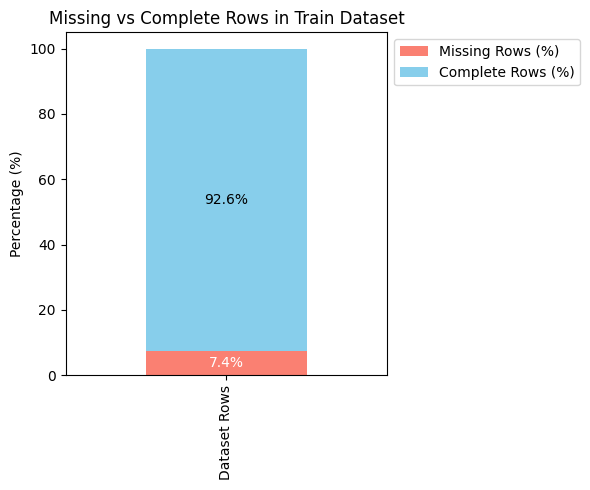

In [155]:
# --------------------------
# 3.4: Check Missing Values (Train Dataset)
# --------------------------

# Check Missing Values
missing_values = ["?", " ?", "NA", "NaN", "Empty", "null","None" ,"", " "]  # placeholders


# Missing per row
total_missing_rows_train = df_train.isin(missing_values).any(axis=1).sum()
percent_impacted_rows_train = (total_missing_rows_train / len(df_train)) * 100


# Total number of missing values in the dataset
total_missing_train = df_train.apply(lambda col: col.isin(missing_values).sum()).sum()

# Total number of cells in the dataset
total_cells_train = df_train.shape[0] * df_train.shape[1]

# Overall percentage of missing values
percentage_missing_total_train = (total_missing_train / total_cells_train) * 100

print("\n--- Check Missing Values in Training Dataset ---")
print("Total missing values in dataset:", total_missing_train)
print("Total rows with at least one missing value:", total_missing_rows_train)
print(f"Percentage of rows impacted by missing values: {percent_impacted_rows_train:.2f}%")
print(f"Percentage of missing values in the dataset: {percentage_missing_total_train:.2f}%")

# Visualization : Row-wise Stacked Bar

missing_bool_train = df_train.isin(missing_values)

rows_with_missing_train = (missing_bool_train.any(axis=1)).sum()
rows_no_missing_train = df_train.shape[0] - rows_with_missing_train

row_percentages_train = pd.DataFrame({
    "Missing Rows (%)": [rows_with_missing_train / df_train.shape[0] * 100],
    "Complete Rows (%)": [rows_no_missing_train / df_train.shape[0] * 100]
})

ax2 = row_percentages_train.plot(kind='bar', stacked=True, figsize=(6,5), color=["salmon", "skyblue"])
plt.ylabel("Percentage (%)")
plt.title("Missing vs Complete Rows in Train Dataset")
plt.xticks([0], ["Dataset Rows"])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Add percentage values
for i, row in enumerate(row_percentages_train.values):
    ax2.text(i, row[0]/2, f"{row[0]:.1f}%", ha='center', va='center', color='white', fontsize=10)
    ax2.text(i, row[0] + row[1]/2, f"{row[1]:.1f}%", ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


**3.5 Check Missing Values (Test Dataset)**


--- Check Missing Values in Training Dataset ---
Total missing values in dataset: 2203
Total rows with at least one missing value: 1221
Percentage of rows impacted by missing values: 7.50%
Percentage of missing values in the dataset: 0.90%


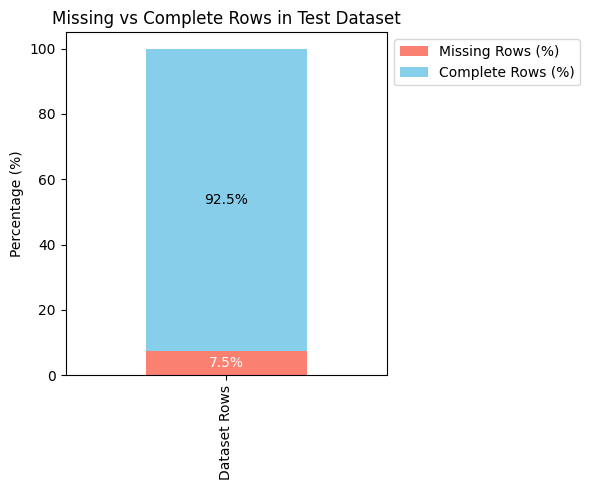

In [156]:
# --------------------------
# 3.5: Check Missing Values (Test Dataset)
# --------------------------

# Check Missing Values
missing_values = ["?", " ?", "NA", "NaN", "Empty", "null","None" ,"", " "]  # placeholders


# Missing per row
total_missing_rows_test = df_test.isin(missing_values).any(axis=1).sum()
percent_impacted_rows_test = (total_missing_rows_test / len(df_test)) * 100


# Total number of missing values in the dataset
total_missing_test = df_test.apply(lambda col: col.isin(missing_values).sum()).sum()

# Total number of cells in the dataset
total_cells_test = df_test.shape[0] * df_test.shape[1]

# Overall percentage of missing values
percentage_missing_total_test= (total_missing_test / total_cells_test) * 100

print("\n--- Check Missing Values in Training Dataset ---")
print("Total missing values in dataset:", total_missing_test)
print("Total rows with at least one missing value:", total_missing_rows_test)
print(f"Percentage of rows impacted by missing values: {percent_impacted_rows_test:.2f}%")
print(f"Percentage of missing values in the dataset: {percentage_missing_total_test:.2f}%")

# Visualization : Row-wise Stacked Bar

missing_bool_test = df_test.isin(missing_values)

rows_with_missing_test = (missing_bool_test.any(axis=1)).sum()
rows_no_missing_test = df_test.shape[0] - rows_with_missing_test


row_percentages_test = pd.DataFrame({
    "Missing Rows (%)": [rows_with_missing_test / df_test.shape[0] * 100],
    "Complete Rows (%)": [rows_no_missing_test / df_test.shape[0] * 100]
})

ax2 = row_percentages_test.plot(kind='bar', stacked=True, figsize=(6,5), color=["salmon", "skyblue"])
plt.ylabel("Percentage (%)")
plt.title("Missing vs Complete Rows in Test Dataset")
plt.xticks([0], ["Dataset Rows"])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Add percentage values
for i, row in enumerate(row_percentages_test.values):
    ax2.text(i, row[0]/2, f"{row[0]:.1f}%", ha='center', va='center', color='white', fontsize=10)
    ax2.text(i, row[0] + row[1]/2, f"{row[1]:.1f}%", ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


## 4. Data Cleaning

**4.1 Fix Mismatch Columns Datatype**

In [157]:
# --------------------------
# Step 4: Data Cleaning - Align Dtypes
# --------------------------

# --------------------------
# Step 4.1: Fix Mismatched Datatypes
# --------------------------

# Columns with mismatched dtypes
mismatched_cols = dtype_check[dtype_check["Train dtypes"] != dtype_check["Test dtypes"]]
print("\nColumns with mismatched dtypes:\n", mismatched_cols)

# Define numeric and categorical columns based on TRAIN dataset
numeric_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
cat_cols = [c for c in df_train.columns if c not in numeric_cols]

# --- Convert numeric columns in TEST to numeric ---
df_test[numeric_cols] = df_test[numeric_cols].apply(pd.to_numeric, errors="coerce")

# --- Convert categorical columns in TEST to string and strip spaces ---
df_test[cat_cols] = df_test[cat_cols].astype(str).apply(lambda x: x.str.strip())

# Optional: Convert numeric columns back to TRAIN dtype if no NaN (nullable Int64 if needed)
for col in numeric_cols:
    if df_test[col].isnull().sum() == 0:
        df_test[col] = df_test[col].astype(df_train[col].dtype)

# --- Check dtype comparison after alignment ---
dtype_check = pd.DataFrame({
    "Train dtypes": df_train.dtypes,
    "Test dtypes" : df_test.dtypes
})

print("\n--- Dtype Comparison (After Replacement) ---")
print(dtype_check)





Columns with mismatched dtypes:
 Empty DataFrame
Columns: [Train dtypes, Test dtypes]
Index: []

--- Dtype Comparison (After Replacement) ---
               Train dtypes Test dtypes
age                   int64       int64
workclass            object      object
fnlwgt                int64       int64
education            object      object
education-num         int64       int64
marital-status       object      object
occupation           object      object
relationship         object      object
race                 object      object
sex                  object      object
capital-gain          int64       int64
capital-loss          int64       int64
hours-per-week        int64       int64
native-country       object      object
income               object      object


**4.2 Remove Duplicate Data**

In [158]:
# --------------------------
# 4.2: Remove Duplicate Data
# --------------------------

print("--- Remove Duplicate Data in Training Dataset ---")
# ℹ️ Show dataset info before cleaning
print("Original df shape (before removing duplicates):", df_train.shape)
print("Number of duplicate rows:", df_train.duplicated().sum())

# 1. All rows that are part of duplicates (every copy, not just the extra ones)
duplicates_removed_train = df_train[df_train.duplicated(keep=False)]

# 2. Cleaned dataset (keeps only 1 copy of each row, removes the extras)
df_no_duplicates_train = df_train.drop_duplicates()

# 3. Only the removed copies (i.e., the duplicates beyond the first appearance)
removed_duplicates_only_train = df_train[df_train.duplicated(keep='first')]

# ✅ Update df to be the cleaned dataset
df_train = df_no_duplicates_train.copy()


print("\nRemove Duplicate Data in Train Dataset Successful!")

# ℹ️ Show dataset info after cleaning
print("\nUpdated df shape (after removing duplicates):", df_train.shape)


print("\n--- Remove Duplicate Data  in Test Dataset ---")
# ℹ️ Show dataset info before cleaning
print("Original df shape (before removing duplicates):", df_test.shape)
print("Number of duplicate rows:", df_test.duplicated().sum())

# 1. All rows that are part of duplicates (every copy, not just the extra ones)
duplicates_removed_test = df_test[df_test.duplicated(keep=False)]

# 2. Cleaned dataset (keeps only 1 copy of each row, removes the extras)
df_no_duplicates_test = df_test.drop_duplicates()

# 3. Only the removed copies (i.e., the duplicates beyond the first appearance)
removed_duplicates_only_test = df_test[df_test.duplicated(keep='first')]

# ✅ Update df to be the cleaned dataset
df_test = df_no_duplicates_test.copy()


print("\nRemove Duplicate Data in Test Dataset Successful!")

# ℹ️ Show dataset info after cleaning
print("\nUpdated df shape (after removing duplicates):", df_test.shape)
print("Removed duplicates shape:", removed_duplicates_only_test.shape)

--- Remove Duplicate Data in Training Dataset ---
Original df shape (before removing duplicates): (32561, 15)
Number of duplicate rows: 24

Remove Duplicate Data in Train Dataset Successful!

Updated df shape (after removing duplicates): (32537, 15)

--- Remove Duplicate Data  in Test Dataset ---
Original df shape (before removing duplicates): (16281, 15)
Number of duplicate rows: 5

Remove Duplicate Data in Test Dataset Successful!

Updated df shape (after removing duplicates): (16276, 15)
Removed duplicates shape: (5, 15)


**4.3 Fix Trailing Dots in 'income' column for Test Dataset**

In [159]:
# --------------------------
# Step 4.3: Fix Trailing Dots in 'income' column
# --------------------------

print("--------Before Replacement--------")
print("First 3 rows of dataset:")
print(df_test.head(3))
print("Dataset shape:", df_test.shape)

if 'income' in df_train.columns:
    # Remove trailing periods
    df_train['income'] = df_train['income'].str.replace('.', '', regex=False)
    df_test['income']  = df_test['income'].str.replace('.', '', regex=False)
    
    # Strip leading/trailing whitespace
    df_train['income'] = df_train['income'].str.strip()
    df_test['income']  = df_test['income'].str.strip()

print("--------After Replacement--------")
print("First 3 rows of dataset:")
print(df_test.head(3))
print("Dataset shape:", df_test.shape)

--------Before Replacement--------
First 3 rows of dataset:
   age  workclass  fnlwgt   education  education-num      marital-status  \
0   25    Private  226802        11th              7       Never-married   
1   38    Private   89814     HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm             12  Married-civ-spouse   

          occupation relationship   race   sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black  Male             0             0   
1    Farming-fishing      Husband  White  Male             0             0   
2    Protective-serv      Husband  White  Male             0             0   

   hours-per-week native-country  income  
0              40  United-States  <=50K.  
1              50  United-States  <=50K.  
2              40  United-States   >50K.  
Dataset shape: (16276, 15)
--------After Replacement--------
First 3 rows of dataset:
   age  workclass  fnlwgt   education  education-num      marita

**4.4 Impute Missing Value**

In [160]:
# --------------------------
# 4.4: Impute Missing Values
# --------------------------

# Define missing value placeholders
missing_values = ["?", " ?", "NA", "NaN", "Empty", "null", "None" ,"", " "]

# Replace placeholders with np.nan
df_train = df_train.replace(missing_values, np.nan)
df_test = df_test.replace(missing_values, np.nan)


# --------------------------
# Separate features and target
# --------------------------
target_col = 'income'
X_train_full = df_train.drop(columns=[target_col])
y_train_full = df_train[target_col].apply(lambda x: 1 if x == '>50K' else 0)

X_test = df_test.drop(columns=[target_col])
y_test = df_test[target_col].apply(lambda x: 1 if x == '>50K' else 0)

# --------------------------
# Identify categorical and numerical columns
# --------------------------
cat_cols = X_train_full.select_dtypes(include='object').columns.tolist()
num_cols = X_train_full.select_dtypes(include=['int64','float64']).columns.tolist()

# --------------------------
# Handle Missing Values in Training Dataset
# --------------------------
print("--- Handle Missing Values in Training Dataset ---")

# Check total missing values before imputation
print("Total missing values per column (train):\n", df_train.isnull().sum())


# Define imputers
cat_imputer = SimpleImputer(strategy="most_frequent")
num_imputer = SimpleImputer(strategy="median")

# --- Fit on TRAIN ---
X_train_full[cat_cols] = cat_imputer.fit_transform(X_train_full[cat_cols])
X_train_full[num_cols] = num_imputer.fit_transform(X_train_full[num_cols])

# Check missing values after imputation
print("Missing values after imputation (train):\n", X_train_full.isnull().sum())

# --------------------------
# Handle Missing Values in Test Dataset
# --------------------------
print("\n--- Handle Missing Values in Test Dataset ---")
print("Total missing values per column (test):\n", df_test.isnull().sum())

# --- Transform TEST using same imputers ---
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Check missing values after imputation
print("Missing values after imputation (test):\n", X_test.isnull().sum())


print("\nHandle Missing Values Successful!\n")

--- Handle Missing Values in Training Dataset ---
Total missing values per column (train):
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64
Missing values after imputation (train):
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

--- Handle Missing Values in Test Dataset ---
Total missing values per column (test):
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status   

**4.5 Log-Transform for Skewed Numeric Features**

In [161]:
# --------------------------
# Step 4.5: Log-transform skewed numeric features
# --------------------------

# Skewed numeric columns
skewed_cols = ['capital-gain', 'capital-loss']

# Apply log1p transformation (log(1 + x)) to avoid issues with 0 values
X_train_full[skewed_cols] = X_train_full[skewed_cols].apply(np.log1p)
X_test[skewed_cols]  = X_test[skewed_cols].apply(np.log1p)

# Optional: Check summary stats after transformation
print("\n--- After Log-transform (Train) ---")
print(X_train_full[skewed_cols].describe())

print("\n--- After Log-transform (Test) ---")
print(X_test[skewed_cols].describe())


--- After Log-transform (Train) ---
       capital-gain  capital-loss
count  32537.000000  32537.000000
mean       0.735163      0.350563
std        2.455562      1.585137
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max       11.512925      8.379539

--- After Log-transform (Test) ---
       capital-gain  capital-loss
count  16276.000000  16276.000000
mean       0.716612      0.352417
std        2.427228      1.589810
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max       11.512925      8.235095


**4.6 Matching Datatype After Imputation**

In [162]:
# --------------------------
# Step 4.6: Matching Datatypes after Imputation
# --------------------------



# Optional: check dtypes after alignment
dtype_check = pd.DataFrame({
    "Train dtypes": X_train_full.dtypes,
    "Test dtypes" : X_test.dtypes
})
print("\n--- Dtype Comparison (Train vs Test) ---")
print(dtype_check)



--- Dtype Comparison (Train vs Test) ---
               Train dtypes Test dtypes
age                 float64     float64
workclass            object      object
fnlwgt              float64     float64
education            object      object
education-num       float64     float64
marital-status       object      object
occupation           object      object
relationship         object      object
race                 object      object
sex                  object      object
capital-gain        float64     float64
capital-loss        float64     float64
hours-per-week      float64     float64
native-country       object      object


### **5. Inspect Data (After Cleaning)**

In [163]:
# --------------------------
# 5: Inspect Dataset (After Cleaning)
# --------------------------

# Dataset Information
print("\n--- Dataset Info ---")
print("\n### Train Data ###")
print(df_train.info())
print("\n### Test Data ###")
print(df_test.info())

# Target Value Counts
print("\n--- Target Value Counts ---")

print("\n### Train Data ###")
print(df_train['income'].value_counts())
print("\n### Test Data ###")
print(df_test['income'].value_counts())

print("\n--- Data Shape ---")

print("###Training Data###")
print("First 5 rows of dataset:")
print(df_train.head())
print("Dataset shape:", df_train.shape)

print("###Test Data###")
print("First 5 rows of dataset:")
print(df_test.head())
print("Dataset shape:", df_test.shape)


--- Dataset Info ---

### Train Data ###
<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None

### Test Data ###
<class 'pandas.core.frame.DataFr

### **6. Data Exploration**

**6.1 Data Visualization (Income >= 50K or Income <=50K)**

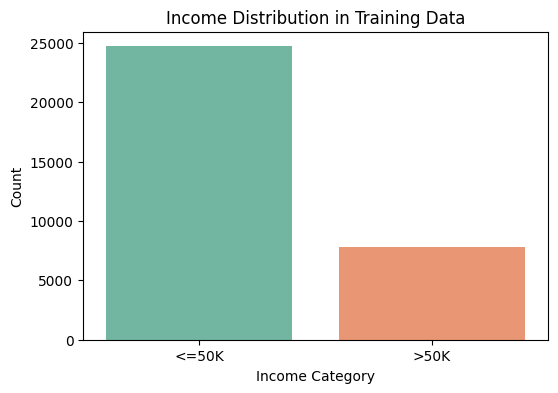

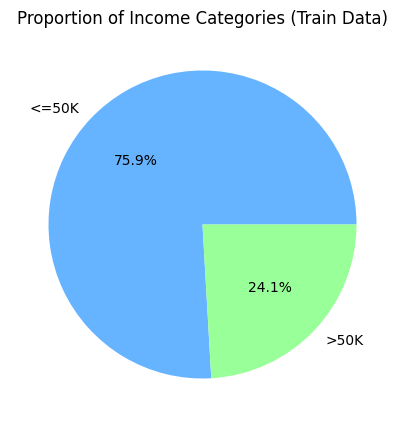

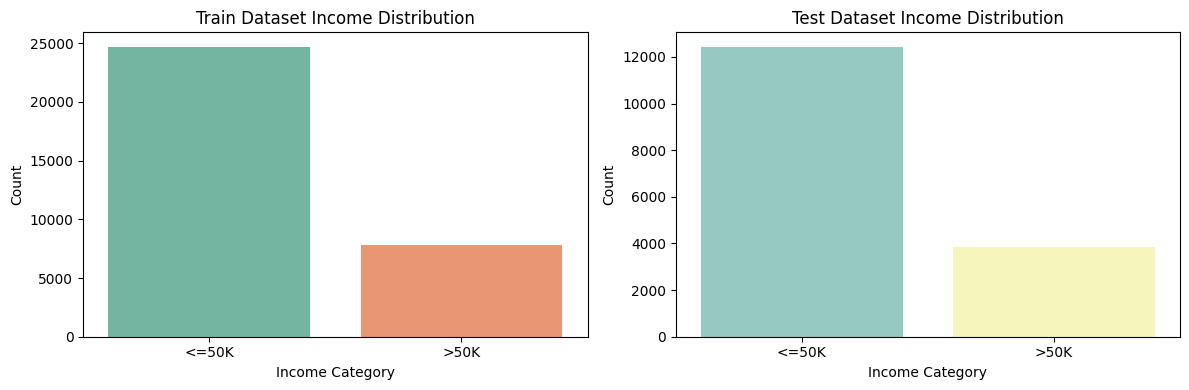

In [164]:
# --------------------------
# 6: Data Exploration
# --------------------------
# --------------------------
# 6.1: Data Visualization
# --------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="income", hue="income", data=df_train, palette="Set2", dodge=False, legend=False)
plt.title("Income Distribution in Training Data")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

income_counts = df_train["income"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(income_counts, labels=income_counts.index, autopct="%1.1f%%", colors=["#66b3ff","#99ff99"])
plt.title("Proportion of Income Categories (Train Data)")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x="income", hue="income", data=df_train, palette="Set2", dodge=False, legend=False, ax=axes[0])
axes[0].set_title("Train Dataset Income Distribution")
axes[0].set_xlabel("Income Category")
axes[0].set_ylabel("Count")

sns.countplot(x="income", hue="income", data=df_test, palette="Set3", dodge=False, legend=False, ax=axes[1])
axes[1].set_title("Test Dataset Income Distribution")
axes[1].set_xlabel("Income Category")
axes[1].set_ylabel("Count")

plt.tight_layout()



**6.2 Identify Outliers and Skewed Data**

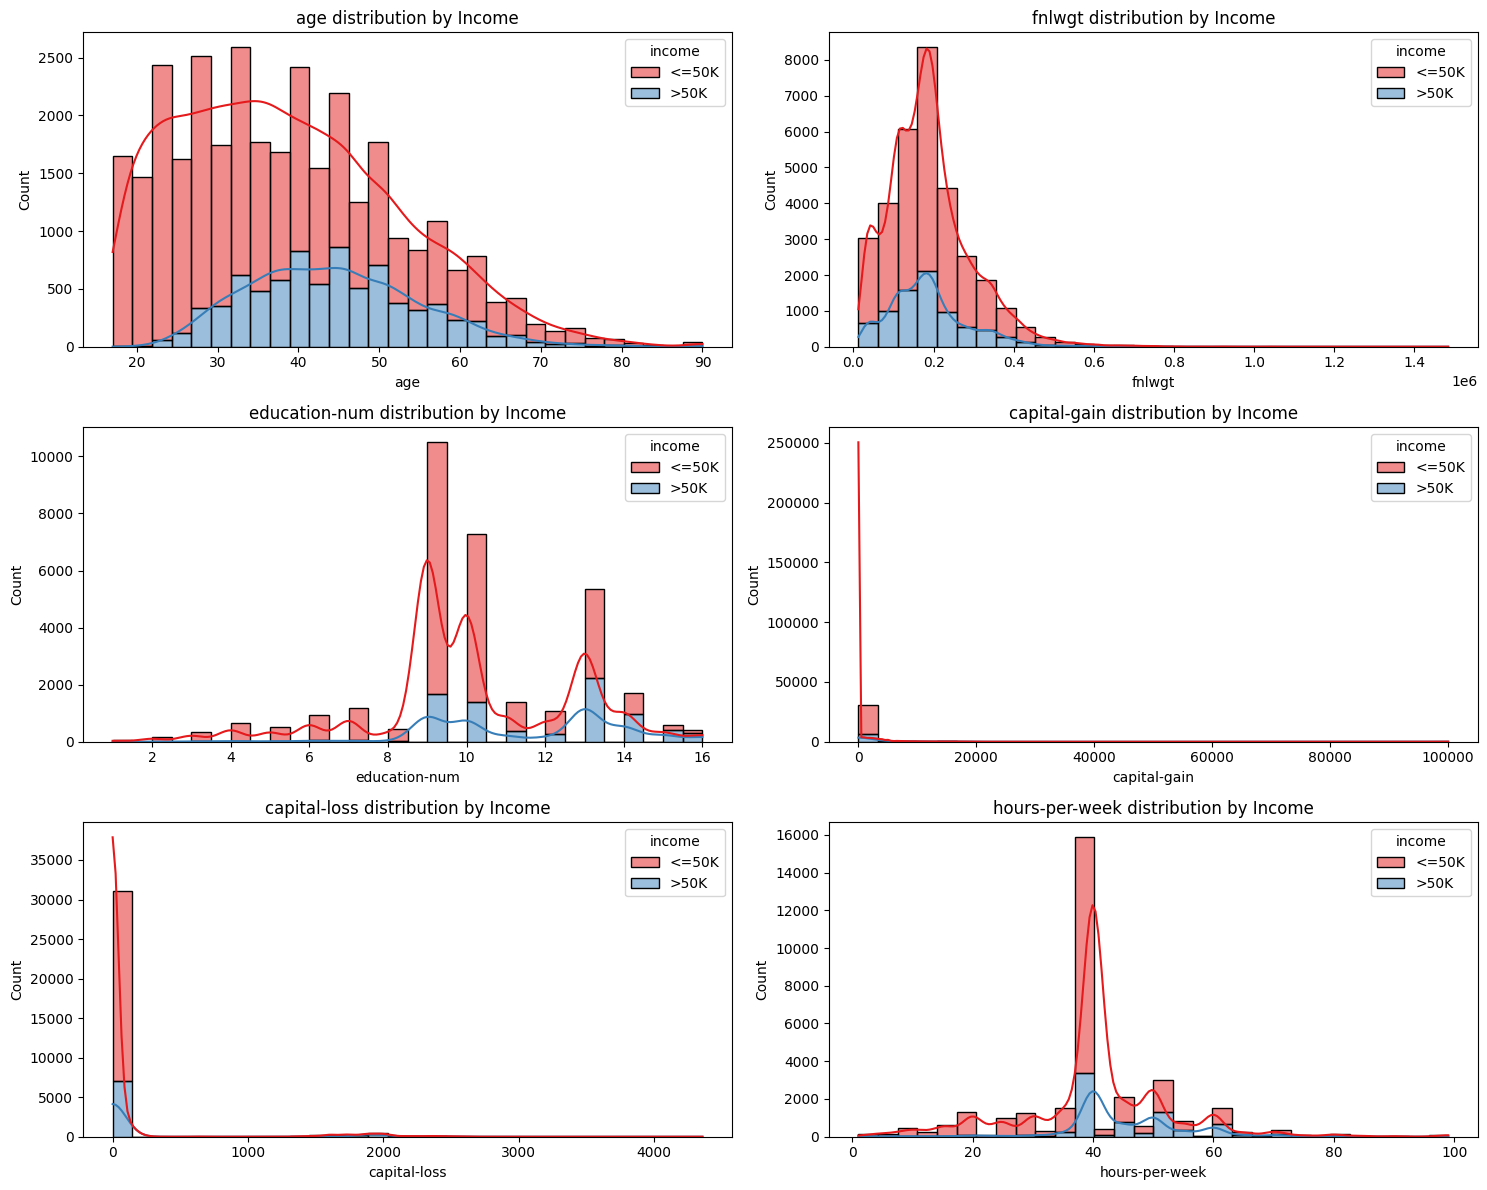

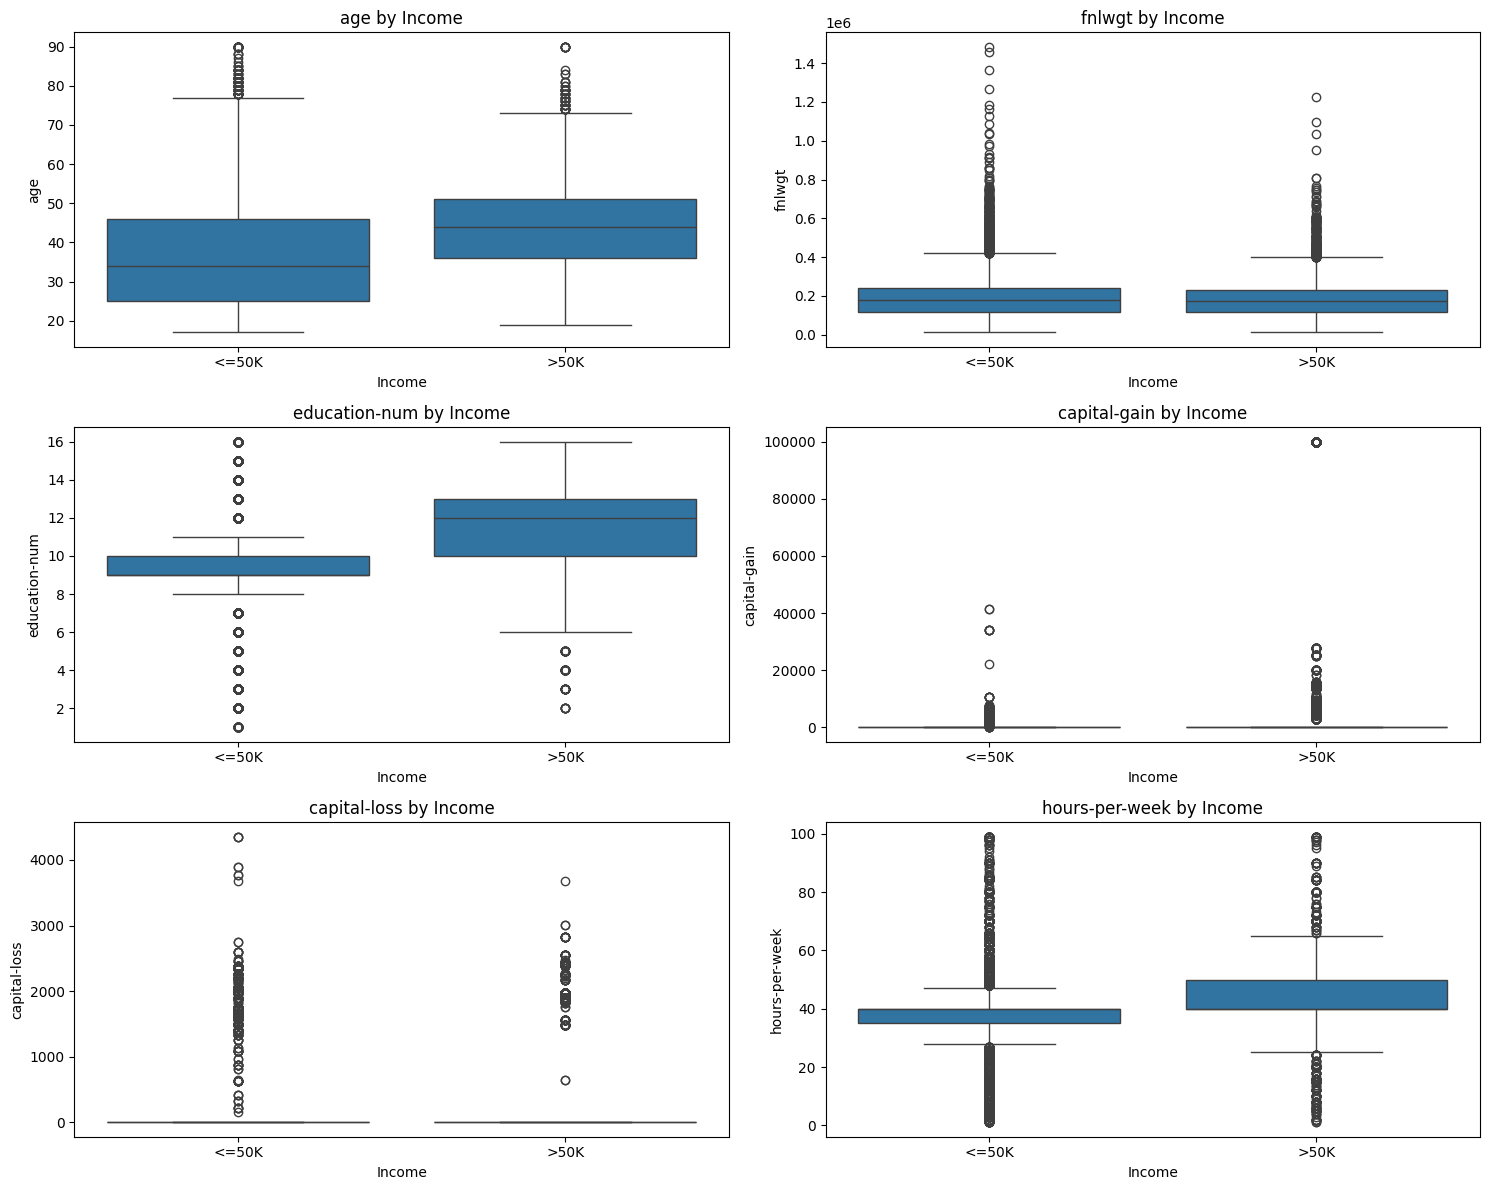

In [165]:
# --------------------------
# 6.2: Identify Outliers and Skewed Data
# --------------------------

num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(15,12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df_train, x=col, hue='income', bins=30, kde=True, palette='Set1', multiple='stack')
    plt.title(f'{col} distribution by Income')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df_train, x='income', y=col)
    plt.title(f'{col} by Income')
    plt.xlabel('Income')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### **7.Data Preprocessing**

**7.1 Train/Validation Split**

In [166]:
# --------------------------
# 7. Data Preparation for Modeling
# --------------------------
# --------------------------
# 7.1: Train/Validation/Test Split
# --------------------------

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (26029, 14) (26029,)
Validation set shape: (6508, 14) (6508,)
Test set shape: (16276, 14) (16276,)


**7.2 Data Preprocessing for Decision Tree**

passtrough for numerical data and using one-hot encoder to transform categorical data (ex:male/female) into numerical type (0/1)

In [ ]:
# --------------------------
# 7.2: Data Preprocessing for Decision Tree
# --------------------------

# --------------------------
# 1. Convert categorical columns to string
# --------------------------
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_val[cat_cols]   = X_val[cat_cols].astype(str)
X_test[cat_cols]  = X_test[cat_cols].astype(str)

# --------------------------
# 2. Define Preprocessor for Decision Tree
# --------------------------

preprocessor_dt = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
    ]
)

# --------------------------
# 3. Define Pipeline (Preprocessing + Model)
# --------------------------
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor_dt),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# --------------------------
# 4. Fit Pipeline and Inspect Preprocessed Data
# --------------------------
dt_pipeline.fit(X_train, y_train)

# Access fitted preprocessor
preprocessor_fitted = dt_pipeline.named_steps['preprocessor']

# Transform datasets
X_train_transformed = preprocessor_fitted.transform(X_train)
X_val_transformed   = preprocessor_fitted.transform(X_val)
X_test_transformed  = preprocessor_fitted.transform(X_test)

# --------------------------
# 5. Display Data Shapes and Feature Info
# --------------------------
print("✅ After preprocessing (inside pipeline):")
print(f"X_train shape: {X_train_transformed.shape}")
print(f"X_val   shape: {X_val_transformed.shape}")
print(f"X_test  shape: {X_test_transformed.shape}")

# Feature breakdown
num_features = len(num_cols)
cat_encoder  = preprocessor_fitted.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(cat_cols)

print(f"\nNumber of numeric features: {num_features}")
print(f"Number of categorical features after encoding: {len(cat_features)}")
print(f"Total features: {num_features + len(cat_features)}")

# --------------------------
# 6. (Optional) Preview first few preprocessed rows
# --------------------------
X_train_df = pd.DataFrame(X_train_transformed, columns=num_cols + list(cat_features))
print("\nPreview of preprocessed training data:")
print(X_train_df.head())




✅ After preprocessing (inside pipeline):
X_train shape: (26029, 97)
X_val   shape: (6508, 97)
X_test  shape: (16276, 97)

Number of numeric features: 6
Number of categorical features after encoding: 91
Total features: 97

Preview of preprocessed training data:
    age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  33.0  279173.0            9.0      0.000000      0.000000            60.0   
1  59.0  271571.0           10.0      9.617471      0.000000            50.0   
2  80.0  184335.0            4.0      0.000000      0.000000            30.0   
3  33.0  100135.0            9.0      0.000000      7.462215            25.0   
4  39.0  315776.0           14.0      9.061260      0.000000            52.0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                  0.0                     0.0                1.0   
1                  0.0                     0.0                1.0   
2                  0.0                     0.0     

**7.3 Data Preprocessing for Neural Network**

Using standard scaler for numerical data and using one-hot encoder for categorical data.

In [168]:
# --------------------------
# 7.3: Data Preprocessing for Neural Network
# --------------------------

# --------------------------
# Convert categorical columns to string
# --------------------------
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_val[cat_cols]   = X_val[cat_cols].astype(str)
X_test[cat_cols]  = X_test[cat_cols].astype(str)

# --------------------------
# Define Preprocessor for Neural Network
# --------------------------
preprocessor_nn = ColumnTransformer(
    transformers=[
        # Scale numeric columns
        ('num', StandardScaler(), num_cols),
        # One-hot encode categorical columns
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
    ]
)

# --------------------------
# Define Neural Network Pipeline
# --------------------------
nn_pipeline = Pipeline([
    ('preprocessor', preprocessor_nn),
    ('classifier', MLPClassifier(
        random_state=42,
        max_iter=500,
        early_stopping=True
    ))
])

# --------------------------
# Fit Pipeline and Inspect Preprocessed Data
# --------------------------
nn_pipeline.fit(X_train, y_train)

# Access fitted preprocessor
preprocessor_fitted = nn_pipeline.named_steps['preprocessor']

# Transform datasets
X_train_transformed = preprocessor_fitted.transform(X_train)
X_val_transformed   = preprocessor_fitted.transform(X_val)
X_test_transformed  = preprocessor_fitted.transform(X_test)

# --------------------------
# Display Data Shapes and Feature Info
# --------------------------
print("✅ After preprocessing (inside NN pipeline):")
print(f"X_train shape: {X_train_transformed.shape}")
print(f"X_val   shape: {X_val_transformed.shape}")
print(f"X_test  shape: {X_test_transformed.shape}")

# Feature breakdown
num_features = len(num_cols)
cat_encoder  = preprocessor_fitted.named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(cat_cols)

print(f"\nNumber of numeric features (scaled): {num_features}")
print(f"Number of categorical features (encoded): {len(cat_features)}")
print(f"Total features: {num_features + len(cat_features)}")

# --------------------------
# Preview first few preprocessed rows (optional)
# --------------------------
X_train_df = pd.DataFrame(X_train_transformed, columns=num_cols + list(cat_features))
print("\nPreview of preprocessed training data:")
print(X_train_df.head())







✅ After preprocessing (inside NN pipeline):
X_train shape: (26029, 105)
X_val   shape: (6508, 105)
X_test  shape: (16276, 105)

Number of numeric features (scaled): 6
Number of categorical features (encoded): 99
Total features: 105

Preview of preprocessed training data:
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0 -0.406578  0.850428      -0.422962     -0.299718     -0.220115   
1  1.498310  0.778261      -0.033239      3.618959     -0.220115   
2  3.036874 -0.049885      -2.371574     -0.299718     -0.220115   
3 -0.406578 -0.849209      -0.422962     -0.299718      4.504569   
4  0.033011  1.197906       1.525651      3.392328     -0.220115   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0        1.574696                    0.0                  0.0   
1        0.770199                    0.0                  0.0   
2       -0.838796                    0.0                  0.0   
3       -1.241044                    0.0                  0

### **8. Model Setup**

**8.1 Decision Tree Train Model**

In [169]:
# --------------------------
# 8. Model Setup and Training
# --------------------------
# --------------------------
# Step 8.1: Decision Tree Train Model
# --------------------------

# --------------------------
# Hyperparameter Tuning
# --------------------------
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    dt_pipeline,
    param_grid=param_grid_dt,
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# --------------------------
# Train the Decision Tree
# --------------------------


# Measure training time
start = time.time()
grid_dt.fit(X_train, y_train)
dt_train_time = time.time() - start
print(f"Decision Tree training time: {dt_train_time:.2f} seconds")

# Best hyperparameters
print(" Best Decision Tree parameters:", grid_dt.best_params_)

# Evaluate on validation set
y_val_pred = grid_dt.predict(X_val)

print("\n--- Decision Tree Validation Report ---")
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = grid_dt.predict(X_test)
print("\n--- Decision Tree Test Report ---")
print(classification_report(y_test, y_test_pred))



warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


Fitting 3 folds for each of 90 candidates, totalling 270 fits
Decision Tree training time: 6.08 seconds
 Best Decision Tree parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

--- Decision Tree Validation Report ---
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4940
           1       0.62      0.63      0.63      1568

    accuracy                           0.82      6508
   macro avg       0.75      0.75      0.75      6508
weighted avg       0.82      0.82      0.82      6508


--- Decision Tree Test Report ---
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12430
           1       0.61      0.62      0.61      3846

    accuracy                           0.82     16276
   macro avg       0.74      0.75      0.75     16276
weighted avg       0.82      0.82      0.82     16

**8.2 Neural Network Training Model**

In [170]:
# --------------------------
# Step 8.2: Decision Tree Train Model
# --------------------------


# --------------------------
# Hyperparameter Tuning for NN
# --------------------------

param_grid_nn = {
    'classifier__hidden_layer_sizes': [(64, 32), (128, 64), (128, 64, 32)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__solver': ['adam'],
    'classifier__alpha': [0.0001, 0.001],
    'classifier__learning_rate_init': [0.001, 0.01]
}

grid_nn = GridSearchCV(
    nn_pipeline,
    param_grid=param_grid_nn,
    cv=3,
    n_jobs=-1,
    scoring='f1',      # optimize for minority class
    verbose=1
)

# --------------------------
# Train the Neural Network
# --------------------------

# Measure training time
start = time.time()
grid_nn.fit(X_train, y_train)
nn_train_time = time.time() - start
print(f"Neural Network training time: {nn_train_time:.2f} seconds")


print("Best NN parameters:", grid_nn.best_params_)

# --------------------------
# Evaluate on Validation Set
# --------------------------
y_val_pred_nn = grid_nn.predict(X_val)
print("\n--- Neural Network Validation Report ---")
print(classification_report(y_val, y_val_pred_nn))

# --------------------------
# Evaluate on Test Set
# --------------------------
y_test_pred_nn = grid_nn.predict(X_test)
print("\n--- Neural Network Test Report ---")
print(classification_report(y_test, y_test_pred_nn))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Neural Network training time: 14.78 seconds
Best NN parameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (128, 64), 'classifier__learning_rate_init': 0.001, 'classifier__solver': 'adam'}

--- Neural Network Validation Report ---
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4940
           1       0.71      0.68      0.70      1568

    accuracy                           0.86      6508
   macro avg       0.81      0.80      0.80      6508
weighted avg       0.85      0.86      0.86      6508


--- Neural Network Test Report ---
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     12430
           1       0.69      0.65      0.67      3846

    accuracy                           0.85     16276
   macro avg       0.79      0.78      0.79     16276
weighted avg      

### **9. Evaluate Models**

**9.1 Model Prediction & Metrics**

In [171]:
# --------------------------
# Step 9: Evaluate Models
# --------------------------
# --------------------------
# 9.1 : Model Prediction and Metrics
# --------------------------

def evaluate_model(model, X_val, y_val, X_test, y_test, model_name="Model"):
    print(f"\n=== {model_name} Prediction ===")
    
    # --- Validation set ---
    start_time = time.time()
    y_val_pred = model.predict(X_val)
    val_time = time.time() - start_time
    
    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred)
    val_rec = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    
    print(f"\n--- Validation Metrics ---")
    print(f"Accuracy: {val_acc:.4f}")
    print(f"Precision: {val_prec:.4f}")
    print(f"Recall: {val_rec:.4f}")
    print(f"F1-score: {val_f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_val_pred)}")
    print(f"\nClassification Report:\n{classification_report(y_val, y_val_pred)}")
    print(f"Prediction Time (Validation): {val_time:.4f} seconds")
    
    # --- Test set ---
    start_time = time.time()
    y_test_pred = model.predict(X_test)
    test_time = time.time() - start_time
    
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_rec = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print(f"\n--- Test Metrics ---")
    print(f"Accuracy: {test_acc:.4f}")
    print(f"Precision: {test_prec:.4f}")
    print(f"Recall: {test_rec:.4f}")
    print(f"F1-score: {test_f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_test_pred)}")
    print(f"Prediction Time (Test): {test_time:.4f} seconds")
    
    # --- Return all metrics + prediction times ---
    return {
        "val": {"accuracy": val_acc, "precision": val_prec, "recall": val_rec, "f1": val_f1, "pred_time": val_time},
        "test": {"accuracy": test_acc, "precision": test_prec, "recall": test_rec, "f1": test_f1, "pred_time": test_time}
    }

# Evaluate Decision Tree
dt_metrics = evaluate_model(grid_dt, X_val, y_val, X_test, y_test, model_name="Decision Tree")

# Evaluate Neural Network
nn_metrics = evaluate_model(grid_nn, X_val, y_val, X_test, y_test, model_name="Neural Network")




=== Decision Tree Prediction ===

--- Validation Metrics ---
Accuracy: 0.8185
Precision: 0.6213
Recall: 0.6320
F1-score: 0.6266
Confusion Matrix:
[[4336  604]
 [ 577  991]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4940
           1       0.62      0.63      0.63      1568

    accuracy                           0.82      6508
   macro avg       0.75      0.75      0.75      6508
weighted avg       0.82      0.82      0.82      6508

Prediction Time (Validation): 0.0088 seconds

--- Test Metrics ---
Accuracy: 0.8151
Precision: 0.6058
Recall: 0.6222
F1-score: 0.6139
Confusion Matrix:
[[10873  1557]
 [ 1453  2393]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12430
           1       0.61      0.62      0.61      3846

    accuracy                           0.82     16276
   macro avg       0.74      0.75      0.75     16

**9.2 Visual Comparison**

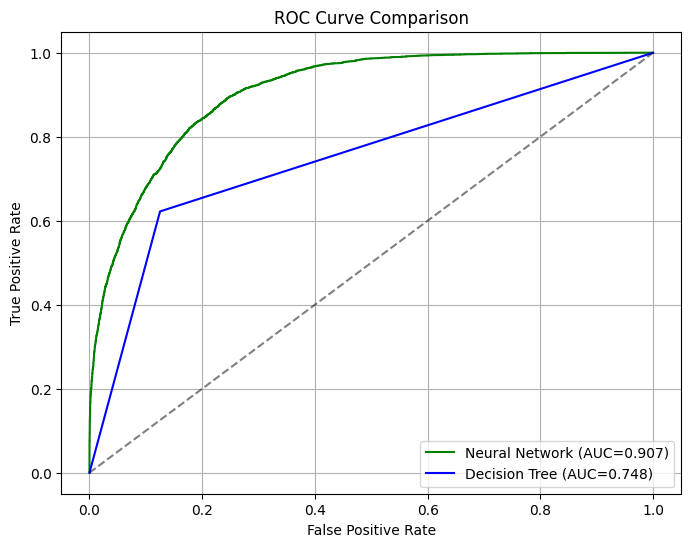

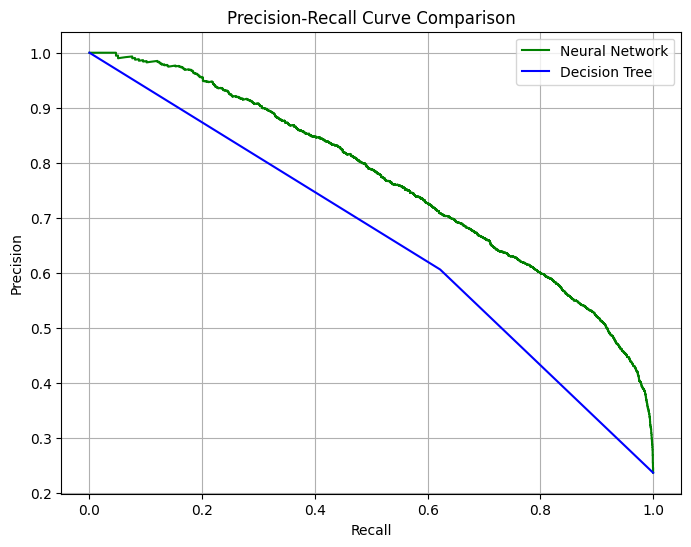

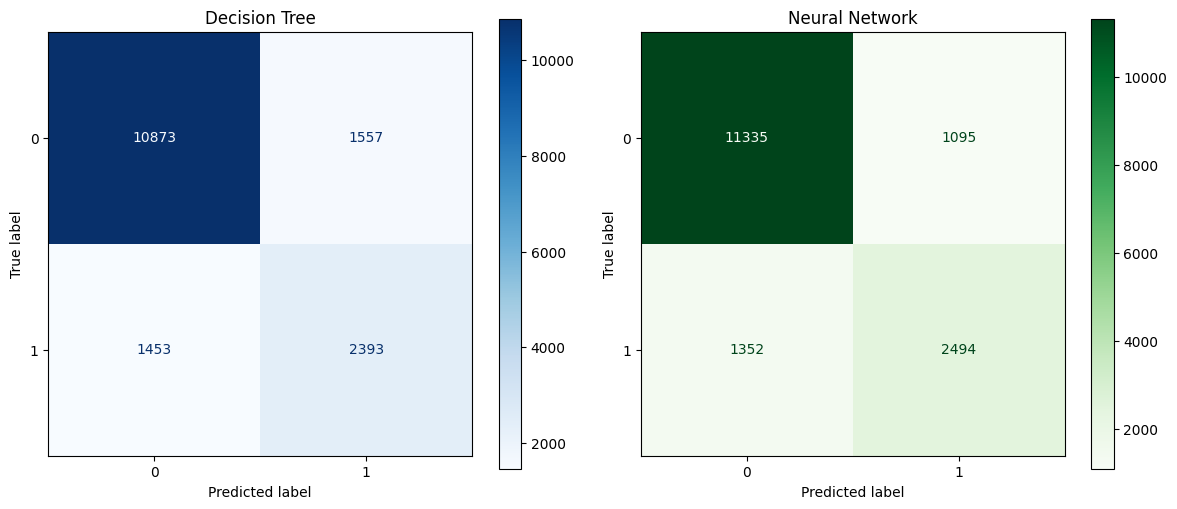

In [172]:
# --------------------------
# 9.2 : Visual Comparison
# --------------------------
# ----------------------------
# 1. ROC Curve
# ----------------------------
# Use predict_proba from the trained pipelines or models
y_nn_prob = grid_nn.predict_proba(X_test)[:, 1]   # X_test after preprocessing in pipeline
y_dt_prob = grid_dt.predict_proba(X_test)[:, 1]   # X_test after preprocessing in pipeline

# Compute ROC curves
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_nn_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC={auc(fpr_nn, tpr_nn):.3f})", color="green")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc(fpr_dt, tpr_dt):.3f})", color="blue")
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


# ----------------------------
# 2. Precision-Recall Curve
# ----------------------------
prec_nn, rec_nn, _ = precision_recall_curve(y_test, y_nn_prob)
prec_dt, rec_dt, _ = precision_recall_curve(y_test, y_dt_prob)

plt.figure(figsize=(8,6))
plt.plot(rec_nn, prec_nn, label="Neural Network", color="green")
plt.plot(rec_dt, prec_dt, label="Decision Tree", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


# ----------------------------
# 3. Confusion Matrix
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Decision Tree
ConfusionMatrixDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax[0], cmap="Blues")
ax[0].set_title("Decision Tree")

# Neural Network
ConfusionMatrixDisplay.from_estimator(grid_nn, X_test, y_test, ax=ax[1], cmap="Greens")
ax[1].set_title("Neural Network")

plt.tight_layout()
plt.show()


**9.3 Comparison Table with Winners**

In [173]:
# --------------------------
# 9.3 : Comparison Table with Winners
# --------------------------

# Collect metrics and times
results = pd.DataFrame({
    "Model": ["Neural Network", "Decision Tree"],
    "Accuracy": [nn_metrics['test']['accuracy'], dt_metrics['test']['accuracy']],
    "Precision": [nn_metrics['test']['precision'], dt_metrics['test']['precision']],
    "Recall": [nn_metrics['test']['recall'], dt_metrics['test']['recall']],
    "F1-Score": [nn_metrics['test']['f1'], dt_metrics['test']['f1']],
    "Training Time (s)": [nn_train_time, dt_train_time],
    "Prediction Time (s)": [nn_metrics['test']['pred_time'], dt_metrics['test']['pred_time']]
})

# Determine winner for Accuracy/Precision/Recall/F1 (higher is better)
winners = []
for col in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    if results.loc[0, col] > results.loc[1, col]:
        winners.append("Neural Network")
    elif results.loc[0, col] < results.loc[1, col]:
        winners.append("Decision Tree")
    else:
        winners.append("Tie")

# Determine winner for Training/Prediction Time (lower is better)
for col in ["Training Time (s)", "Prediction Time (s)"]:
    if results.loc[0, col] < results.loc[1, col]:
        winners.append("Neural Network")
    elif results.loc[0, col] > results.loc[1, col]:
        winners.append("Decision Tree")
    else:
        winners.append("Tie")

# Add winners row
results.loc["Winner"] = ["--"] + winners

# Display table
print("\n--- Comparison Table with Winners ---")
print(results)

# Determine best overall model (most wins)
winner_counts = pd.Series(winners).value_counts()
best_model = winner_counts.idxmax()
print(f"\nBest overall model: {best_model}")




--- Comparison Table with Winners ---
                 Model        Accuracy       Precision          Recall  \
0       Neural Network        0.849656        0.694901        0.648466   
1        Decision Tree        0.815065        0.605823        0.622205   
Winner              --  Neural Network  Neural Network  Neural Network   

              F1-Score Training Time (s) Prediction Time (s)  
0             0.670881         14.780768            0.024713  
1             0.613905          6.075124             0.02083  
Winner  Neural Network     Decision Tree       Decision Tree  

Best overall model: Neural Network
